<a href="https://colab.research.google.com/github/gabderrico05/Ciencia-de-Dados-e-Sistemas-Inteligentes/blob/main/Analise_de_Dados_censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/CDSI/Fonte_de_dados/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
base_censo = pd.read_csv(caminho + "census.csv")

In [ ]:
base_censo

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# age - discreta
# workclass (não ordinal é nominal)
# final
# education - ordinal (interpretação)
# Anos - é discreto (número de anos)
# estado civil, posição na familia - nominal
# ocupação, raça e sexo - nominais
# horas trabalhadas - discreta
# pais - nominal
# class - é ordinal

base_censo.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_censo.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Visualização dos dados

In [ ]:
np.unique(base_censo["income"], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

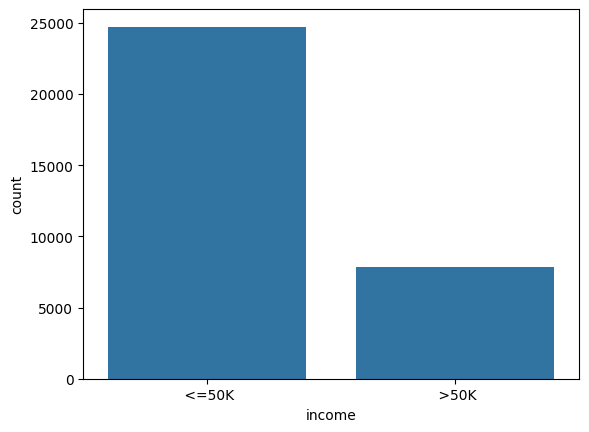

In [ ]:
sns.countplot( x = base_censo["income"])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

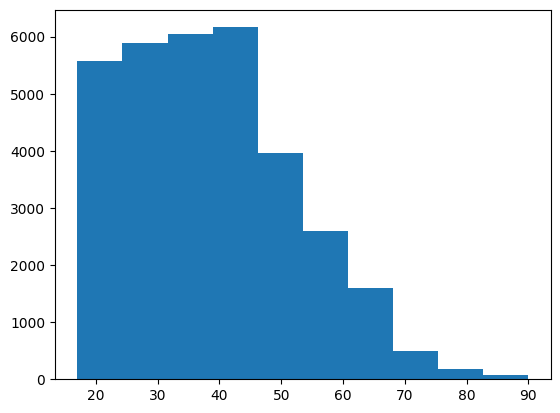

In [ ]:
plt.hist( x = base_censo["age"])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

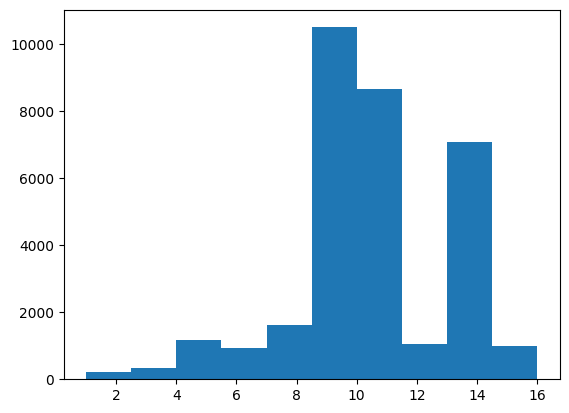

In [ ]:
plt.hist( x = base_censo["education-num"])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

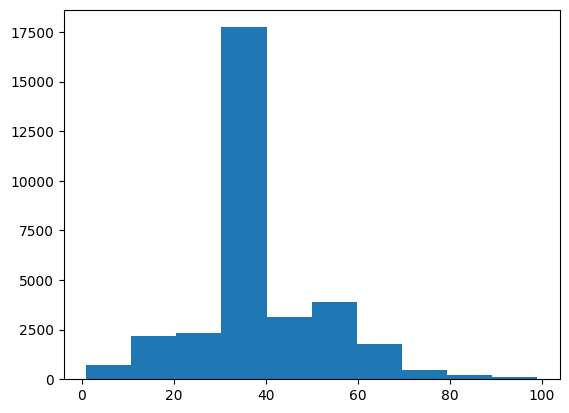

In [ ]:
plt.hist( x = base_censo["hour-per-week"])

In [ ]:
grafico = px.treemap(base_censo, path = ['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(base_censo, path = ['occupation', 'relationship', 'age'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_censo, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_censo, dimensions=[ 'workclass','occupation', 'income'])
grafico.show()